In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/tiari/Downloads/owid-covid-data.csv")

In [3]:
# verificare le dimensioni del dataset e i relativi metadati
df.shape

(429435, 67)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
df.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
216783,LTU,Europe,Lithuania,2023-10-09,1331558.0,0.0,231.429,9714.0,0.0,0.571,...,38.0,NaN,6.56,75.93,0.882,2750058,NaN,NaN,NaN,NaN
304799,PCN,Oceania,Pitcairn,2021-03-14,0.0,0.0,0.000,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN
90555,CYP,Europe,Cyprus,2020-05-29,927.0,0.0,1.857,17.0,0.0,0.000,...,52.7,NaN,3.40,80.98,0.887,896007,NaN,NaN,NaN,NaN
365459,LKA,Asia,Sri Lanka,2023-04-18,672104.0,0.0,2.143,16835.0,0.0,0.143,...,27.0,NaN,3.60,76.98,0.782,21832150,NaN,NaN,NaN,NaN
422724,WLF,Oceania,Wallis and Futuna,2024-08-01,3760.0,0.0,0.000,9.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,11596,NaN,NaN,NaN,NaN
38574,BEN,Africa,Benin,2020-03-03,0.0,0.0,0.000,0.0,0.0,0.000,...,12.3,11.035,0.50,61.77,0.545,13352864,NaN,NaN,NaN,NaN
19382,ABW,North America,Aruba,2022-08-26,42638.0,0.0,22.857,227.0,0.0,0.143,...,NaN,NaN,NaN,76.29,NaN,106459,NaN,NaN,NaN,NaN
161256,GUY,South America,Guyana,2022-01-31,58979.0,0.0,478.714,1160.0,0.0,5.429,...,NaN,77.159,1.60,69.91,0.682,808727,NaN,NaN,NaN,NaN
180533,IRL,Europe,Ireland,2020-10-11,40703.0,3640.0,520.000,1797.0,14.0,2.000,...,25.7,NaN,2.96,82.30,0.955,5023108,1319.2999,5.38,8.24,266.73416
6218,DZA,Africa,Algeria,2023-04-15,271613.0,0.0,3.000,6881.0,0.0,0.000,...,30.4,83.741,1.90,76.88,0.748,44903228,NaN,NaN,NaN,NaN


In [6]:
# controllo dei valori 
df.continent.value_counts(dropna = False)

continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
NaN              26525
South America    23440
Name: count, dtype: int64

In [7]:
# Si chiede di trovare, per ogni continente:

In [8]:
# a. il numero di casi fin dall'inizio della pandemia
group_continent = df.groupby("continent", dropna = False)
casi_totali = group_continent["total_cases"].sum()
casi_totali

continent
Africa           1.461689e+10
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
Oceania          1.159805e+10
South America    7.348457e+10
NaN              2.317360e+12
Name: total_cases, dtype: float64

In [9]:
# b. la percentuale rispetto al totale mondiale del numero di casi
print(round(100 * casi_totali / df.total_cases.sum(), 2))

continent
Africa            0.48
Asia              8.31
Europe            7.81
North America     4.19
Oceania           0.38
South America     2.42
NaN              76.40
Name: total_cases, dtype: float64


In [10]:
# Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
df.date = pd.to_datetime(df.date)
filtro_italy = df.location == "Italy"
filtro_2022 = df.date.dt.year == 2022
ita_2022 = filtro_italy & filtro_2022
ita_2022 = df[ita_2022]

In [11]:
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno

<Axes: xlabel='date'>

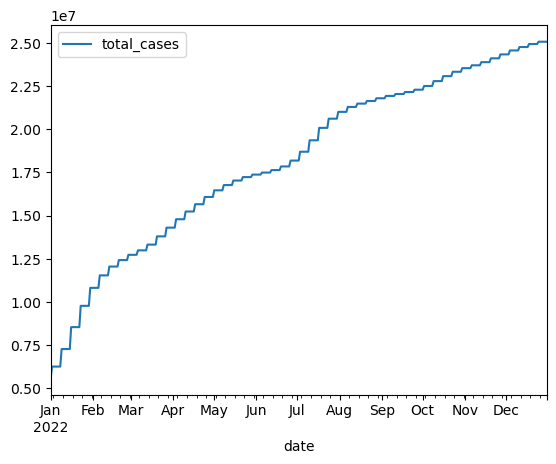

In [12]:
ita_2022.plot(kind ="line",x ="date", y ="total_cases")

<Axes: xlabel='date'>

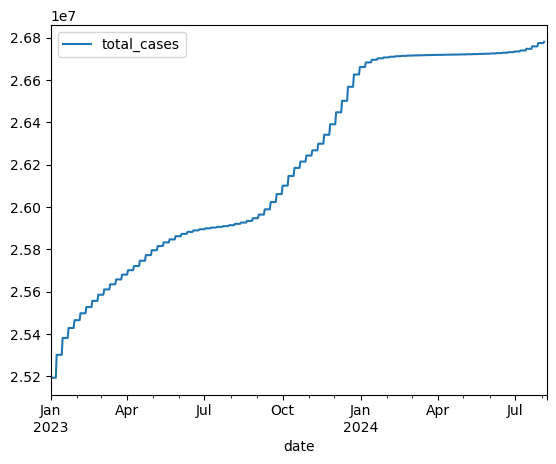

In [13]:
# b. il numero di nuovi casi rispetto alla data
filtro_dal2023 =  df.date >= "2023-01-01"
new_cas = (filtro_italy & filtro_dal2023)
new_cas = df[new_cas]
new_cas.plot(kind="line", x="date", y="total_cases")

<Axes: xlabel='date'>

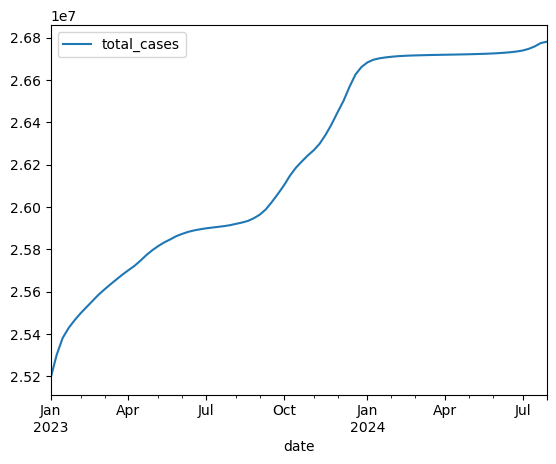

In [14]:
# k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
new_cas_weekly = new_cas.loc[new_cas["new_cases"] > 0]
new_cas_weekly.plot(kind="line", x="date", y="total_cases")

In [15]:
# Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) 

In [16]:
filtro_mag22 = df.date >= "2022-05-01"
filtro_apr23 = df.date <= "2023-04-30"
filtro_date = filtro_mag22 & filtro_apr23
ita = df.iso_code  == "ITA"
deu = df.iso_code  == "DEU"
fra = df.iso_code  == "FRA"
paesi = ita | deu | fra
dfa = df.loc[paesi & filtro_date]

<Axes: xlabel='iso_code', ylabel='icu_patients'>

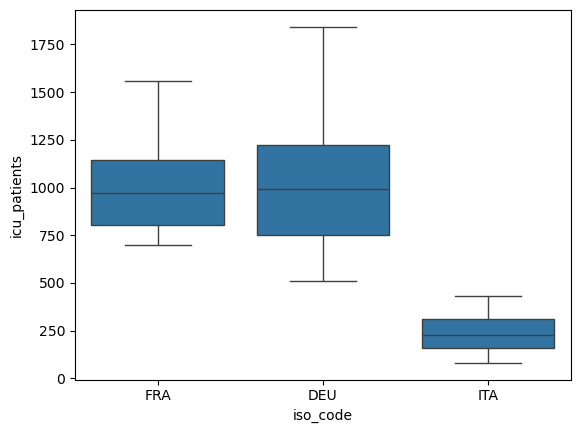

In [17]:
sns.boxplot(data =dfa, x="iso_code", y="icu_patients")

In [18]:
#a. scrivere un breve commento a riguardo

In [19]:
# ---> dal boxplot qui sopra rappresentato possiamo notare in maniera visibilmente evidente 3 fattori: 
# 1. l'Italia è il paese con il minor numero di pazienti in terapia intensiva (ed effettivamente i dati tornano poichè siamo stati i primi ad iniziare con i vaccini e le cure)  
# 2. la Germania è il paese con il numero massimo di pazienti in terapia intensiva più alto. 
# 3. la Francia e la Germania mostrano una mediana ed un range interquartile (IQR) molto simile, seppur in due contesti ben differenti (da notare il range di pazienti in terapia intensiva, che ci fa capire quanto fosse grave la situazione in Germania), guardando il grafico possiamo però notare il range interquartile tedesco tendente al basso, questo potrebbe significare un grande cambiamento in termini di cura e prevenzione (es.l'inizio dei vaccini, quindi delle cure, l'apertura di nuovi centri sanitari, l'inizio del lockdown)
# Infine è giusto complimentarci qualche volta con l'Italia perché possiamo notare un range ristretto di pazienti in terapia intensiva, che va a significare un'ottima risposta rapida e decisa.

In [20]:
# Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
# a. mostrare la somma dei pazienti ospitalizzati per ognuna

In [21]:
# sostituzione dei NULLI "FRA"
dff = df[fra]
dff.hosp_patients = dff.hosp_patients.interpolate()
dff.hosp_patients.isna().sum()

C:\Users\tiari\AppData\Local\Temp\ipykernel_42644\1265946009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.hosp_patients = dff.hosp_patients.interpolate()


73

In [22]:
# sostituzione dei NULLI "ITA"
dfi = df[ita]
dfi.hosp_patients = dfi.hosp_patients.interpolate()
dfi.hosp_patients.isna().sum()

C:\Users\tiari\AppData\Local\Temp\ipykernel_42644\4132730732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi.hosp_patients = dfi.hosp_patients.interpolate()


50

In [23]:
# sostituzione dei NULLI "ESP"
dfe = df[df["iso_code"] =="ESP"]
dfe.hosp_patients = dfe.hosp_patients.interpolate()
dfe.hosp_patients.isna().sum()

C:\Users\tiari\AppData\Local\Temp\ipykernel_42644\506486869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe.hosp_patients = dfe.hosp_patients.interpolate()


209

In [24]:
# sostituzione dei NULLI "DEU" (anche se sono 0 data l'assenza di dati, mi serviva per il concat...)
dfd = df[deu]
dfd.hosp_patients = dfd.hosp_patients.interpolate()

C:\Users\tiari\AppData\Local\Temp\ipykernel_42644\3981455232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.hosp_patients = dfd.hosp_patients.interpolate()


In [25]:
# creazione di un DataFrame contenente la sostituzione dei nulli per ogni stato indicato
db = pd.concat([dff, dfi, dfe, dfd])

In [26]:
# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno
# ---> E' POSSIBILE GESTIRE I DATI NULLI?
#  Diciamo che per rispondere a questa domanda ed alla traccia in sè bisogna fare un'analisi del contesto attuale e di ciò che viene richiesto; ho deciso di riportare entrambe le soluzioni per un semplice motivo: è un'esercitazione. Mi sembrava la cosa migliore provare a risolvere il "problema" nel modo più sensato possibile (quindi tramite .interpolate(), con una media per non falsare l'analisi), ma nel contesto effettivo della traccia non avrei sostituito i dati nulli, perché stiamo parlando di un contesto e di dati molto delicati e tentare di sostituirli potrebbe facilmente portare ad invalidare l'intera analisi dando un risultato non idoneo.

In [27]:
filtro_2023 = db.date.dt.year == 2023
filtrodf_2023 = df.date.dt.year == 2023
db = db.loc[filtro_2023]
df_23 = df.loc[filtrodf_2023]

df_group_iso_interpolate = db.groupby("iso_code")["hosp_patients"].sum() 
df_group_iso = df_23.groupby("iso_code")["hosp_patients"].sum() 

df_group_iso_interpolate.loc[["ESP", "ITA", "DEU", "FRA"]] # dataframe 2023 con valori nulli sostituiti [.interpolate()] 

iso_code
ESP     737054.0
ITA    1175272.0
DEU          0.0
FRA    4998549.0
Name: hosp_patients, dtype: float64

In [28]:
df_group_iso.loc[["ESP", "ITA", "DEU", "FRA"]] # dataframe 2023 SENZA aver sostituito i nulli

iso_code
ESP     354602.0
ITA    1175272.0
DEU          0.0
FRA    1382574.0
Name: hosp_patients, dtype: float64